In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_sacks_yds_salary_18-19')

In [3]:
qbs.dtypes

NAME              object
SACK YDS           int64
SACK YDS_rank    float64
salary             int64
dtype: object

In [4]:
qbs.head()

,NAME,SACK YDS,SACK YDS_rank,salary
0,Teddy Bridgewater,8,2.5,6000000
1,Derek Anderson,33,5.5,1073530
2,Josh McCown,35,8.0,10000000
3,Colt McCoy,36,9.0,3250000
4,Blaine Gabbert,37,10.0,2000000


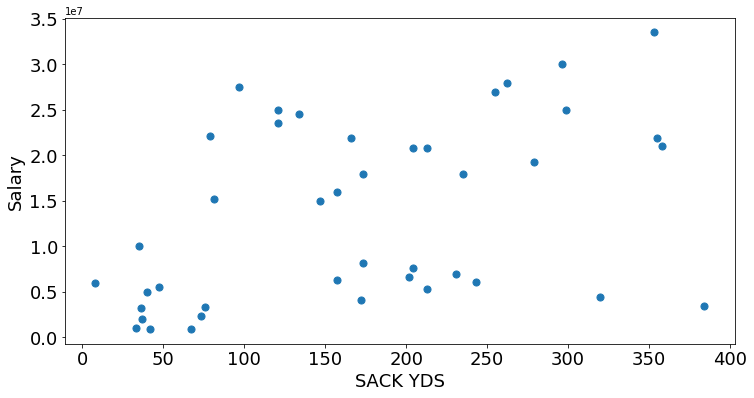

In [5]:
ax = qbs.plot(kind="scatter", x = 'SACK YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('SACK YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['SACK YDS', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 6.34413157e-17, -6.34413157e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.30675341,  1.24298356],
       [-1.20866969, -1.02989164],
       [-0.21677247,  0.7211755 ],
       [ 1.73723688, -1.00246958],
       [ 0.27311346, -0.74817535]])

In [11]:
km.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,SACK YDS,SACK YDS_rank,salary,clusters
0,Teddy Bridgewater,8,2.5,6000000,1
1,Derek Anderson,33,5.5,1073530,1
2,Josh McCown,35,8.0,10000000,1
3,Colt McCoy,36,9.0,3250000,1
4,Blaine Gabbert,37,10.0,2000000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[3.07125000e+02, 2.57062500e+07],
       [4.49090909e+01, 3.66558564e+06],
       [1.48307692e+02, 2.06461410e+07],
       [3.52000000e+02, 3.93150450e+06],
       [1.99375000e+02, 6.39746212e+06]])

In [14]:
qbs.groupby('clusters')[['SACK YDS', 'salary']].mean()

,SACK YDS,salary
clusters,,
0,307.125000,2.570625e+07
1,44.909091,3.665586e+06
2,148.307692,2.064614e+07
3,352.000000,3.931504e+06
4,199.375000,6.397462e+06


In [15]:
centroids = qbs.groupby('clusters')[['SACK YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

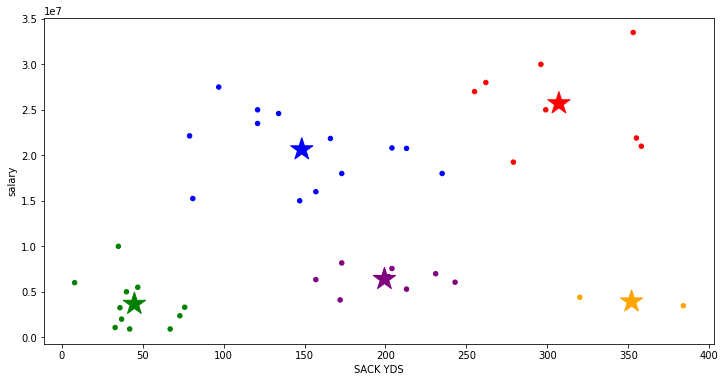

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'SACK YDS', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'SACK YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

9.749117378809174

In [18]:
silhouette_score(X, km.labels_)

0.5641111060217903